In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

rc('font', size=12)
rc('axes', titlesize=14)
rc('axes', labelsize=14)

# SNR calculation

In [7]:
def compute_mad(array, med):
    series_mad = np.abs(array - med)
    return np.median(series_mad)

In [8]:
def compute_mom(L):
    if len(L) < 10:
        L.sort()
        return L[int(len(L) / 2)]
    S = []
    l_index = 0

    for l_index in range(0, len(L) - 1, 5):
        S.append(L[l_index:l_index + 5])

    S.append(L[l_index:])
    Meds = []

    for sub_list in S:
        Meds.append(compute_mom(sub_list))

    L2 = compute_mom(Meds)
    L1 = L3 = []

    for i in L:
        if i < L2:
            L1.append(i)
        if i > L2:
            L3.append(i)

    if len(L) < len(L1):
        return compute_mom(L1)

    elif len(L) > len(L1) + 1:
        return compute_mom(L3)

    else:
        return L2

In [9]:
def downsample(array, downsampling):
    if downsampling == 0:
        return array

    series = []
    for i in range(0, len(array), downsampling):
        series.append(np.mean(array[i:i+downsampling]))
    return np.asarray(series)

In [10]:
def draw(n_samples=2500):
    return np.random.normal(0, 1, n_samples)

# Large number experiment

In [11]:
def snr_median_mad(n_trials=1000, downsampling_level=250, n_samples=2500):
    SNRs = np.zeros([downsampling_levels, n_trials])

    for trial in range(n_trials):
        distribution = draw(n_samples)
        for level in range(downsampling_levels):
            distribution = downsample(distribution, level)
            med = np.median(distribution)
            SNRs[level, trial] = (np.max(distribution) - med)/(compute_mad(distribution, med)*1.48)
    return SNRs

def snr_mom_mad(n_trials=1000, downsampling_level=250, n_samples=2500):
    SNRs = np.zeros([downsampling_levels, n_trials])

    for trial in range(n_trials):
        distribution = draw(n_samples)
        for level in range(downsampling_levels):
            distribution = downsample(distribution, level)
            mom = compute_mom(distribution)
            SNRs[level, trial] = (np.max(distribution) - mom)/(compute_mad(distribution, mom)*1.48)
            
    return SNRs

In [12]:
n_trials = 1000
downsampling_levels = 250
n_samples=2500

SNR_median = snr_median_mad(n_trials, downsampling_levels, n_samples)
SNR_mom = snr_mom_mad(n_trials, downsampling_levels, n_samples)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


## Plotting functions

In [24]:
def plot_trigger_ratio(SNRs, threshold = 6):
    fig, ax = plt.subplots()

    for level in range(SNRs.shape[0]):
        if level != 0:
            ax.scatter(n_samples/level, 
                       len(SNRs[level][np.where(SNRs[level] > threshold)])/n_trials, 
                       color='black')
        else:
            ax.scatter(n_samples, 
                       len(SNRs[level][np.where(SNRs[level] > threshold)])/n_trials, 
                       color='black')

        ax.set_xlabel("N")
        ax.set_ylabel("Trigger fraction")
        
def plot_max_snr_per_downsampling_level(SNRs):
    fig, ax = plt.subplots()

    for level in range(SNRs.shape[0]):
        if level != 0:
            ax.scatter(n_samples/level, 
                       np.max(SNRs[level]), 
                       color='black')
        else:
            ax.scatter(n_samples, 
                       np.max(SNRs[level]),
                       color='black')

        ax.set_xlabel("N")
        ax.set_ylabel("Max(SNR)")

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


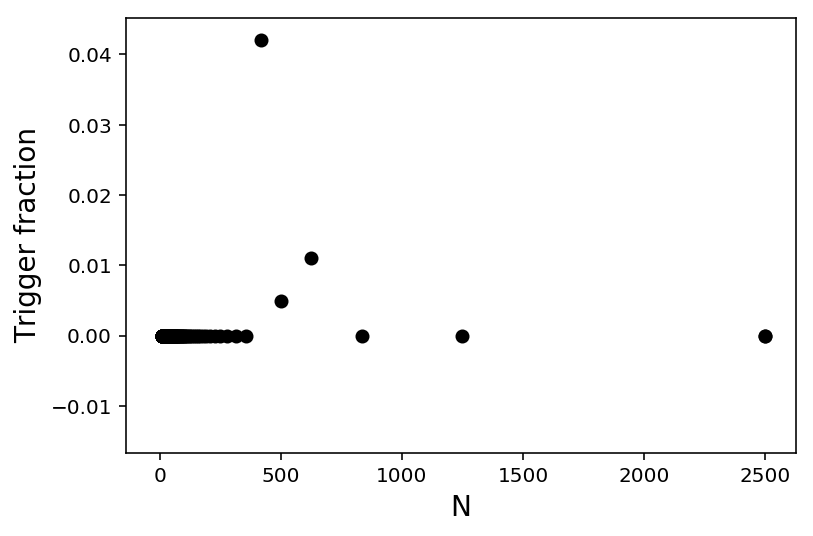

In [32]:
plot_trigger_ratio(SNR_median, 6)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


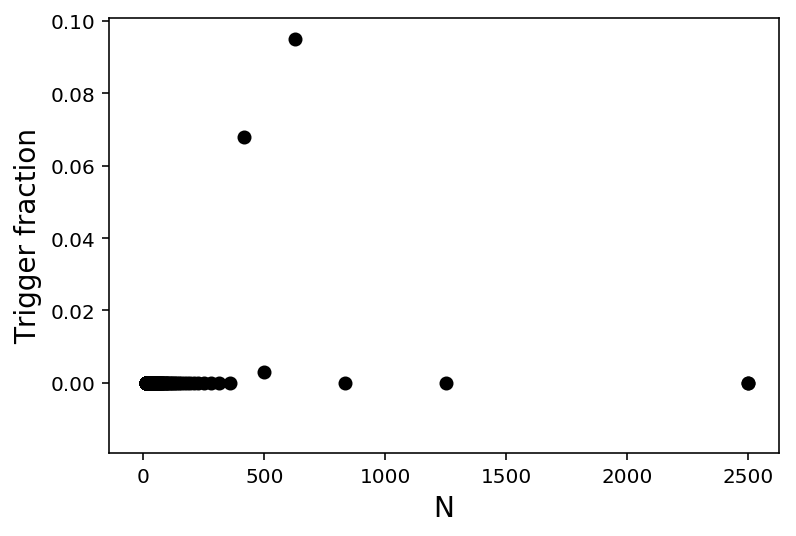

In [31]:
plot_trigger_ratio(SNR_mom, 6)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


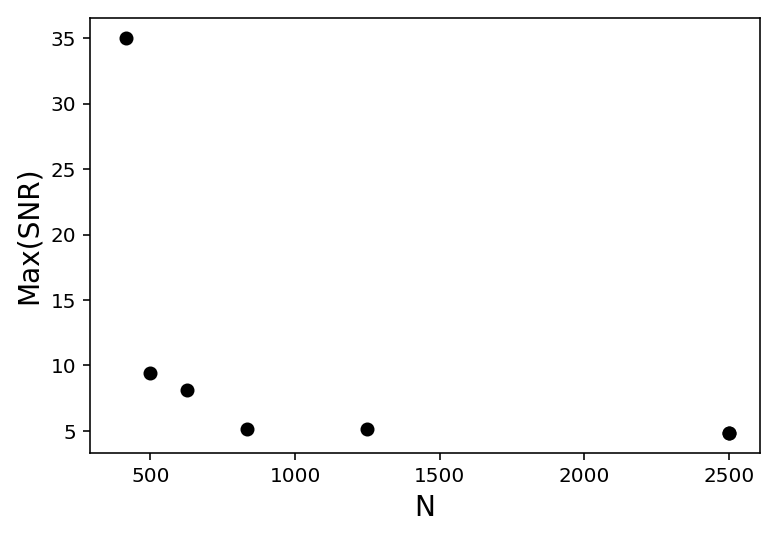

In [27]:
plot_max_snr_per_downsampling_level(SNR_median)

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


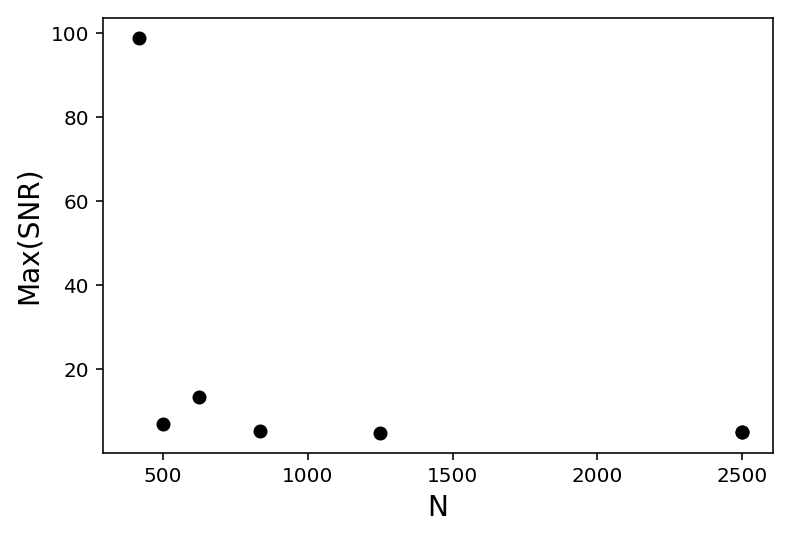

In [28]:
plot_max_snr_per_downsampling_level(SNR_mom)

In [29]:
for level in range(SNRs.shape[0]):
    try:
        print (level, n_samples/level)
    except:
        print (level, n_samples)

NameError: name 'SNRs' is not defined

In [ ]:
for i in range(100, -5, -5):
    print (len(downsample(draw(), i)))